Our goal is to create a new Hertsprung-Russell (HR, or color-magnitude diagram) based on data from the Gaia satellite. 

# 1. Obtain the data from the Gaia archive and examine the data

Query the Gaia archive <url>https://gea.esac.esa.int/archive/ </url> and ask for the Gaia DR3 number, the parallax and its error, the magnitude of the star in G, and its color Bp-Rp (in the units of magnitude) and the relative photometric uncertainties (which are given in flux units).   Only get the data for stars within 50pc of the Sun (note that Gaia reports parallaxes in milliarcseconds) and which are of high astrometric quality astrometry (astrometry is the science of determining the position of stars, whichis how parallaxes are determined). Here, I am defining high quality parallaxes to have an uncertainty of less than 10%, ruwe < 1.4 and astrometric_excess_noise < 1.8.  Download a csv file. 

Below is a simple example of an ADQL query to the Gaia archive, which will help you write your own request to the archive.<br>
> `SELECT  g.source_id,g.parallax` <br>
> `FROM gaiadr3.gaia_source as g` <br>
> `WHERE g.parallax > 20` <br> 
> `AND g.parallax_over_error > 20` <br>


You will need to use the online documentation to figure out the names of the columns to use: <url>https://gea.esac.esa.int/archive/documentation/GEDR3/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html</url>   Feel free to ask if you don't understand the meanings of the various columns (such as the relative flux uncertainties).

### 1.a. Read in the data. Print out the first few entries of the table.


In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

# reading and printing the first few entries of the table
gaia_df = pd.read_csv('Tables/neighbors-result.csv', header=0)
gaia_df.head()

source_id   parallax  parallax_error  phot_g_mean_mag     bp_rp  \
0   931119295974643968  20.000054        0.017343        10.433743  1.437148   
1   722095297945702144  20.000285        0.029691        14.993248  2.899363   
2  6084676427333622784  20.000542        0.032952        15.566566  3.362689   
3  2951163636442230784  20.000747        0.155529        18.130836  4.202551   
4  3421660600590138112  20.000763        0.404657        19.521220  3.383293   

   phot_rp_mean_flux_over_error  phot_g_mean_flux_over_error  \
0                     411.22214                    3606.3787   
1                     703.14440                    1599.5051   
2                     957.54517                    1884.4958   
3                     185.76210                     260.8659   
4                      56.68439                     291.6503   

   phot_bp_mean_flux_over_error  
0                    838.382200  
1                    167.723200  
2                    127.268040  
3                      8.325261  
4                      5.479925

### 1.b. Calculate the distance and absolute G magnitudes. 


In [170]:
# creating the distance and abs_g_mag columns; note that we have to multiply our answer by 1000 as parallax is in milliarcseconds
gaia_df['distance'] = (1/gaia_df['parallax']) * 1000
gaia_df['abs_g_mag'] = gaia_df['phot_g_mean_mag'] - 5*np.log10(gaia_df['distance']) + 5

### 1.c. Plot the color-magnitude (HR) diagram.

Don't forget the usual axis labels/clarity requirements.

(23.0, 0.0)

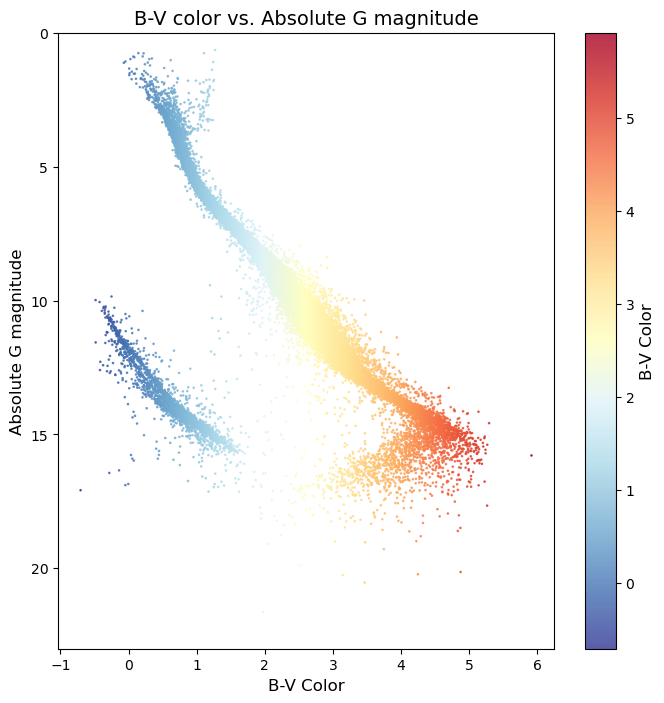

In [171]:
from matplotlib.colors import LinearSegmentedColormap

# making the plot itself
plt.figure(figsize=(8,8)) # sets the figure size, in inches# this line sorts the spectral types in order of the alphabet
p = plt.scatter(gaia_df['bp_rp'], gaia_df['abs_g_mag'], c=gaia_df['bp_rp'], cmap='RdYlBu_r', alpha=0.8, s = 0.75) # alpha=0.8 sets the opacity to semi-transparent.

# adding color bar
cbar = plt.colorbar(p)

# adding labels and titles
cbar.set_label('B-V Color', fontsize = 12)
plt.xlabel('B-V Color', fontsize = 12)
plt.ylabel('Absolute G magnitude', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('B-V color vs. Absolute G magnitude', fontsize = 14)

# change axes limits and invert axes so it makes sense
plt.ylim(23, 0)

# 2. Investigating the data

Data that comes in is never perfect. The plot we made above looks <i>kind of</i> like an HR diagram. You should be able to identify the main sequence, and a white dwarf sequence. There aren't evolved stars mostly because I only looked at the nearest stars, and evolved stars are rare (<i>Why does that make sense?</i>) But then there's this hockey stick where the fainter stars start getting bluer again--we know from other observations that this isn't correct. The reason is that some of the data has bad quality. Although it still won't be perfect, we can do a lot of good by cleaning away data that doesn't have good signal-to-noise in the brightness measurements.

### 2.a. The flux error column.

The first column we want to look at is `phot_bp_mean_flux_over_error`. What information is contained within this column? What does higher vs lower values mean?




<span style="color:blue">
    This column contains the mean flux in the integrated BP band over the error in the mean flux. Higher values indicate a lower error in the mean flux, and thus a higher BP signal-to-noise ratio. Lower values indicate a higher error in the mean flux, and thus a lower signal-to-noise ratio.
</span>


### 2.b. Make plots to examine this column.

Make three plots:
1) a plot of Bp-Rp color vs `phot_bp_mean_flux_over_error`
2) a plot of Bp-Rp color vs `phot_rp_mean_flu_over_error`
3) a plot of G mag vs `phot_g_mean_flux_over_error`

It may help to use log scaling for some of your axes: test it out and see which ones convey the information best.


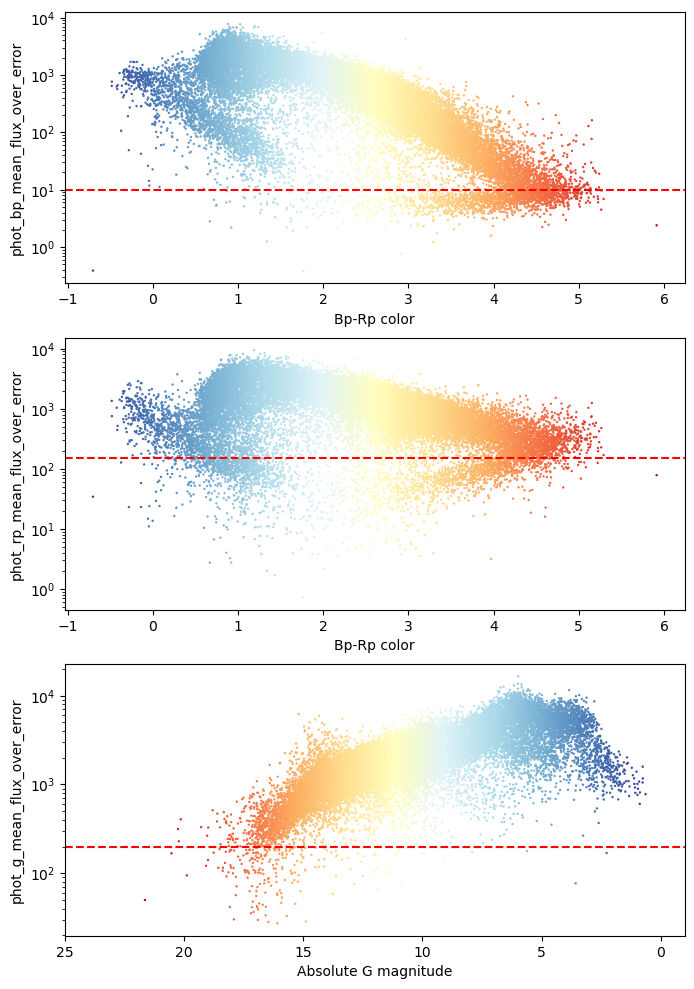

In [172]:
# setting figure size
plt.figure(figsize=(8,12))

# first subplot of Bp-Rp color vs phot_bp_mean_flux_over_error
plt.subplot(3,1,1)
plt.scatter(gaia_df['bp_rp'], gaia_df['phot_bp_mean_flux_over_error'], c=gaia_df['bp_rp'], cmap='RdYlBu_r', s=0.5)
plt.xlabel('Bp-Rp color')
plt.ylabel('phot_bp_mean_flux_over_error')
plt.yscale('log')
# adding cutoff line
plt.axhline(y=10, color='r', linestyle='--')


# second subplot of Bp-Rp color vs phot_rp_mean_flux_over_error
plt.subplot(3,1,2)
plt.scatter(gaia_df['bp_rp'], gaia_df['phot_rp_mean_flux_over_error'], c=gaia_df['bp_rp'], cmap='RdYlBu_r', s=0.5)
plt.xlabel('Bp-Rp color')
plt.ylabel('phot_rp_mean_flux_over_error')
plt.yscale('log')
# adding cutoff line
plt.axhline(y=150, color='r', linestyle='--')

# third subplot of G mag vs phot_g_mean_flux_over_error
plt.subplot(3,1,3)
plt.scatter(gaia_df['abs_g_mag'], gaia_df['phot_g_mean_flux_over_error'], c=gaia_df['abs_g_mag'], cmap='RdYlBu_r', s=0.5)
plt.xlabel('Absolute G magnitude')
plt.ylabel('phot_g_mean_flux_over_error')
plt.yscale('log')
plt.xlim(25, -1)
# adding cutoff line
plt.axhline(y=200, color='r', linestyle='--')

### 2.c. Interpretation

What did your plots show? What's a reasonable cut to use to cut out the low S/N measurements?

<span style="color:blue">
    To remove the unnatural behavior of the main sequence (the hockey stick area), I needed to remove lower values of mean flux over error to keep high S/N measurements. For the G band, a cutoff of 200 seems to work well. For the BP band, a cutoff of 10 works well. I initially used a cutoff of 200 for the RP band as well, but I lowered it to 150 to preserve more high quality stars. As the BP cutoff was quite clean, I found that most of the erroneous stars were removed with this check anyways, so I could loosen the S/N cutoff for the RP band. All of these cutoffs are indicated by the dotted red lines in the above graphs. FOr the RP band, some stars with appropriate values are removed, but this is necessary to keep the main sequence looking natural.
</span>

# 3. Cleaning the data

## 3.a. Creating and using boolean arrays

You can select parts of an array using boolean logic, which is to say, asking whether something is True or False. For example `good = df['column'] > 15` will produce a <b>boolean</b> array filled with True (where the condition is met, i.e. the entry is greater than 15) or False (where the condition is not met). Below I've created a boolean array `bp_good` which will be True when the S/N is high on the Bp measurement--this is the data we want to keep. Note that I am using the value 15 as an example; you will need to use the value you determined in the previous step. 

### 3.a.i. Add a similar line to create an array `rp_good`  and `G_good`

In [173]:
bp_good = gaia_df['phot_bp_mean_flux_over_error'] > 10
rp_good = gaia_df['phot_rp_mean_flux_over_error'] > 150
G_good = gaia_df['phot_g_mean_flux_over_error'] > 200

### 3.a.ii. Examine the arrays you've created. 

You can now select entries from the table using the boolean arrays. The code below will produce an array of `bp_rp` that contains every entry where `bp_good` is True (and exclude those where `bp_good` is False). Examine the output by plotting the data, to verify that behavior is what you expect.

In [174]:
gaia_df['bp_rp'][bp_good]


0        1.437148
1        2.899363
2        3.362689
5        3.856501
6        4.022102
           ...   
31315    2.834036
31316    2.215609
31317    4.184836
31318    2.833697
31319    3.804580
Name: bp_rp, Length: 29202, dtype: float64

(18.0, 0.0)

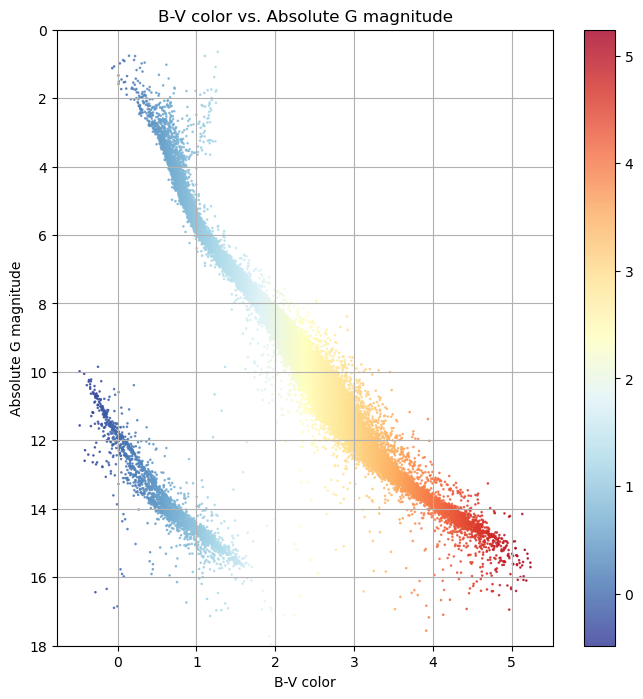

In [175]:
plt.figure(figsize=(8,8))

plt.scatter(gaia_df['bp_rp'][bp_good], gaia_df['abs_g_mag'][bp_good], c=gaia_df['bp_rp'][bp_good], cmap='RdYlBu_r', alpha=0.8, s = 0.75)
plt.colorbar()
plt.grid()
plt.title('B-V color vs. Absolute G magnitude')
plt.xlabel('B-V color')
plt.ylabel('Absolute G magnitude')
plt.ylim(18, 0)

Explain why your table and/or plot demonstrates the code is working.

<span style="color:blue">
    The plot above demonstrates working code as it shows a CMD with a more natural main sequence. The "hockey stick" area where lower magnitude stars became more blue was removed. The data is filtered to only include high S/N measurements, as indicated by the cutoffs in the previous section.
</span>

## 3.b. Combining boolean arrays

We can combine two (or more) boolean arrays. Below I've created a small example where you can explore this ability. 

In [176]:
# two boolean arrays to select based upon
bool1 = np.array([True, True, False, False, True])
bool2 = np.array([False, True, True, False, False])
# some arrays of values
number = [1, 2, 3, 4, 5]
letter = ['a', 'b', 'c', 'd', 'e']

# create an astropy table containing this information
data = Table([bool1, bool2, number, letter], names=['bool1','bool2','number','letter']).to_pandas()

# select only the data where bool1 is True:
data[bool1]

bool1  bool2  number letter
0   True  False       1      a
1   True   True       2      b
4   True  False       5      e

### 3.b.i Select data from the table based on where `bool1` is True.

In [177]:
# selecting only the data where bool1 is True
data[bool1]

bool1  bool2  number letter
0   True  False       1      a
1   True   True       2      b
4   True  False       5      e

### 3.b.ii. Select data from the table based on where `bool1` AND `bool2` are True. 

You can combine boolean arrays like so: `bool1 & bool2` 

In [178]:
# selecting only the data where bool1 AND bool2 are True
data[bool1 & bool2]

bool1  bool2  number letter
1   True   True       2      b

If instead you wanted the case where `bool1` OR `bool2` is True, you could use: `bool1 | bool2` 

# 4. A better HR diagram

### 4.a. Make an HR diagram using only those stars for which G, Bp and Rp have sufficient S/N.

(18.0, 0.0)

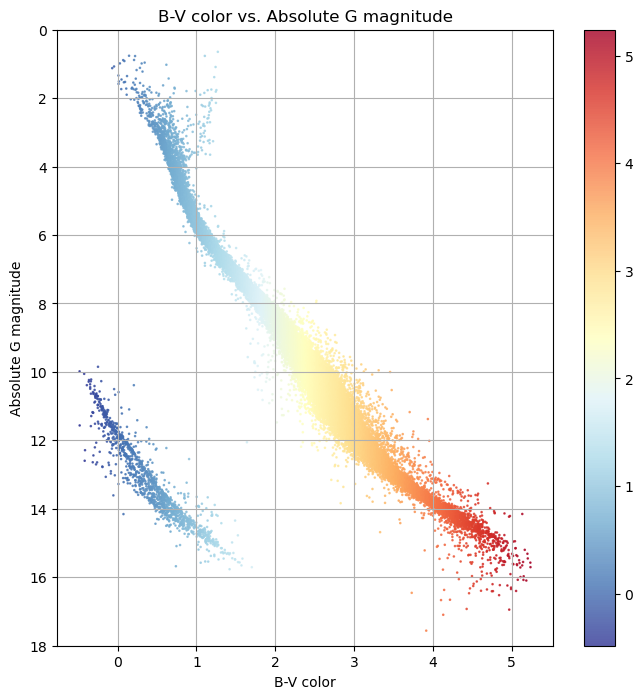

In [179]:
plt.figure(figsize = (8,8))

# making the plot itself
plt.scatter(gaia_df['bp_rp'][bp_good & rp_good & G_good], gaia_df['abs_g_mag'][bp_good & rp_good & G_good], c=gaia_df['bp_rp'][bp_good & rp_good & G_good], cmap='RdYlBu_r', alpha=0.8, s = 0.75)

# Adding some other stuff
plt.colorbar()
plt.grid()
plt.title('B-V color vs. Absolute G magnitude')
plt.xlabel('B-V color')
plt.ylabel('Absolute G magnitude')
plt.ylim(18, 0)

 ### 4.b. Brainstorm ways to present the data differently.

What are some ways you could present these data differently?  


<span style="color:blue">
    - Colorbar could be used to present the relative ages of the stars
    - 3D HR diagram could be created with the extra axis showing distance from the sun
    - B-V color could be binned into different stellar classifications and a histogram could be created to show the distribution of stars
    -
</span>

### 4.c. Make different versions of this plot.

Pick at least one your ideas from the previous part and make them! Then, comment: What did you want to convey with the idea? Do you think it worked?

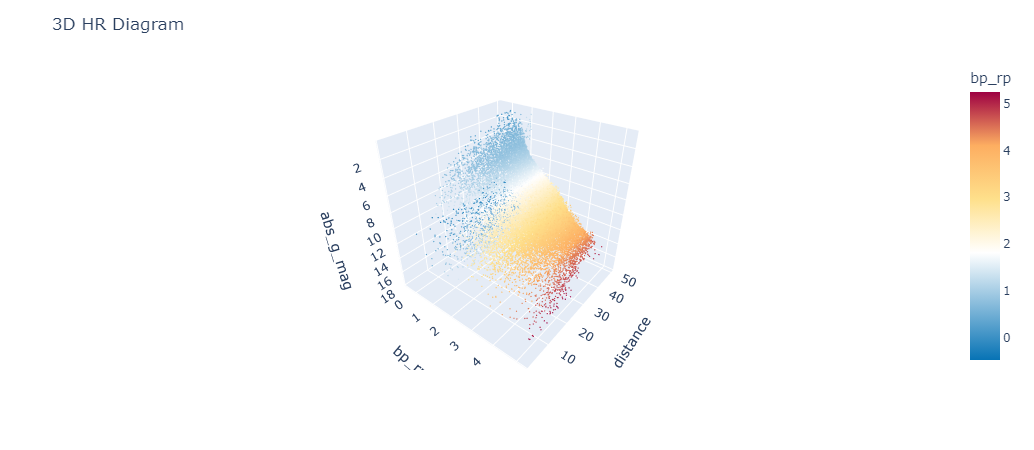

In [180]:
import plotly.express as px

# making the 3D HR Diagram
fig = px.scatter_3d(gaia_df[bp_good & rp_good & G_good], x='bp_rp', y='distance', z='abs_g_mag', color='bp_rp', color_continuous_scale=[
[0, '#0773b5'], # the colors here are once again meant to approximate the colors of stars
[0.4, 'rgb(255, 255, 255)'],
[0.6, '#fee08b'],
[0.8, '#fdae61'],
[1, '#9e0142']
])
camera = dict(
    eye=dict(x=1.2, y=-1.5, z=1.2)
)
fig.update_layout(scene_camera=camera, title='3D HR Diagram')

# decreasing the size of the points
fig.update_traces(marker=dict(size=0.75))

# reversing z axis limits
fig.update_scenes(zaxis_autorange='reversed')

fig.show()

# this is so that the plot shows up in the pdf
# from IPython.display import Image
# Image('Figures/3D_HR.png')

<span style="color:blue">
    I chose to create the 3D HR Diagram because I thought it would look the best, and it does have some interesting information. The plot shows the distribution of stars in 3D space, with the color indicating the B-V color of the star. The vast majority of stars within 10pc of the Sun are earlier main sequence stars and white dwarfs. Older, hotter main sequence stars start to appear much further from the Sun. Stars in general appear sparser closer to the Sun and more densely packed further away from it, but this is due the fact that an increase in parsec distance increases the spherical "detection volume" around the Sun by a factor of r^3. Unfortunately, this does make the plot a bit misleading, and also slightly cluttered toward the end of the distance values. Despite these setbacks, it still contains some unique information about the distribution of stars in our neighborood.
    If you are reading this on the pdf, note that the 3D plot is interactive on the Jupyter notebook.
</span>